# Deep Learning Using Pytorch

Refer [ZTM Pytorch at Udemy](https://www.learnpytorch.io/01_pytorch_workflow/)

Pytorch Workflow
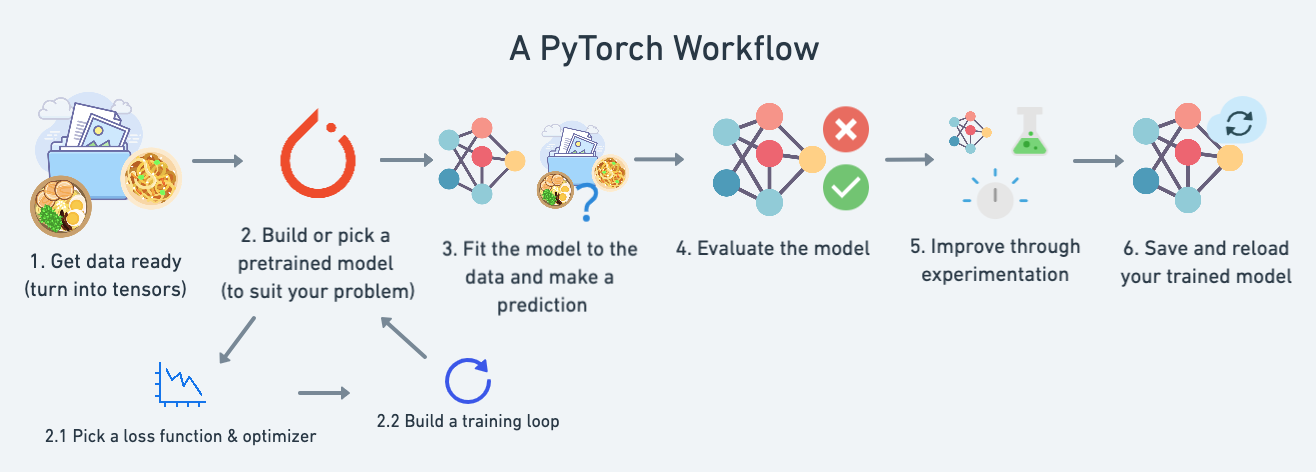

## Importing

In [1]:
# Check for GPU
import torch
from torch import nn
from torch import optim

import matplotlib.pyplot as plt
# plt.style.use('dark_background')
%matplotlib inline

import pandas as pd
import numpy as np

## Device Config

In [2]:
print(f"Pytorch Version: {torch.__version__}")
print(f"GPU available: {torch.cuda.is_available()}")
print(f"GPU Count: {torch.cuda.device_count()}")

Pytorch Version: 2.1.0
GPU available: True
GPU Count: 1


Refer for GPU Devices: [Device-agnostic code](https://pytorch.org/docs/master/notes/cuda.html#device-agnostic-code)

In [3]:
# Set device type
device = "cuda" if torch.cuda.is_available() else "cpu"

## Basics of ANN

[Dynamic Computation Graph in Pytorch](https://neptune.ai/blog/moving-from-tensorflow-to-pytorch)
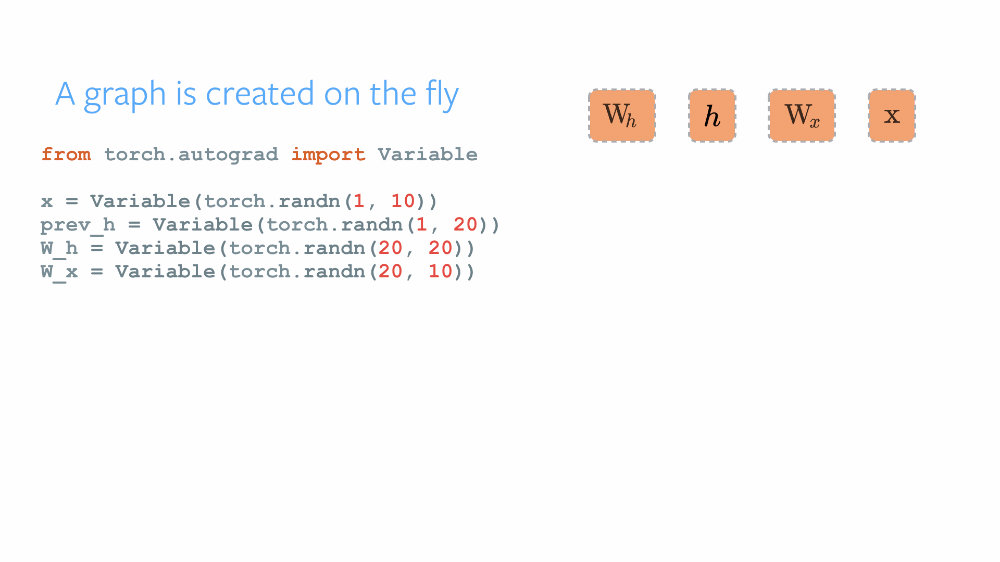

### Linear Regression using Pytorch

We'll use linear regression to create the data with known parameters (things that can be learned by a model) and then we'll use PyTorch to see if we can build model to estimate these parameters using [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent).

In [4]:
#### GENERATING DATA
# Create *known* parameters
weight = 0.7
bias = 0.3


start, end, step = 0, 1, 0.02

X = torch.arange(start, end, step)  # X (features)
y = weight * X + bias  # y (labels).

In [5]:
# Creating pairs of elements from the first 10 elements of X and y
paired_elements = list(zip(X[:10], y[:10]))
paired_elements

[(tensor(0.), tensor(0.3000)),
 (tensor(0.0200), tensor(0.3140)),
 (tensor(0.0400), tensor(0.3280)),
 (tensor(0.0600), tensor(0.3420)),
 (tensor(0.0800), tensor(0.3560)),
 (tensor(0.1000), tensor(0.3700)),
 (tensor(0.1200), tensor(0.3840)),
 (tensor(0.1400), tensor(0.3980)),
 (tensor(0.1600), tensor(0.4120)),
 (tensor(0.1800), tensor(0.4260))]

In [6]:
# Stacking the first 10 elements of X and y tensors along dimension 1
torch.stack(tensors=(X[:10], y[:10]), dim=1)

tensor([[0.0000, 0.3000],
        [0.0200, 0.3140],
        [0.0400, 0.3280],
        [0.0600, 0.3420],
        [0.0800, 0.3560],
        [0.1000, 0.3700],
        [0.1200, 0.3840],
        [0.1400, 0.3980],
        [0.1600, 0.4120],
        [0.1800, 0.4260]])

In [7]:
def train_test_split(X, y, split_ratio=0.8):
    # Determine the split indices
    split_index = int(split_ratio * len(X))

    # Split the data into training and testing sets
    X_train, y_train = X[:split_index], y[:split_index]
    X_test, y_test = X[split_index:], y[split_index:]

    return X_train, y_train, X_test, y_test


# Create train/test split
X_train, y_train, X_test, y_test = train_test_split(X, y)

# Display the lengths of train and test sets
print(f"Train set length - X: {len(X_train)}, y: {len(y_train)}")
print(f"Test set length - X: {len(X_test)}, y: {len(y_test)}")

Train set length - X: 40, y: 40
Test set length - X: 10, y: 10


In [8]:
def plot_predictions(train_features, train_labels, test_features, test_labels, predictions=None):
    """
    Plots training data, test data, and compares predictions.

    Args:
    - train_features: Features of the training data
    - train_labels: Labels of the training data
    - test_features: Features of the test data
    - test_labels: Labels of the test data
    - predictions: Predicted values (if available for test data)
    """

    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_features, train_labels,
                c="royalblue", s=5, label="Training data")

    # Plot test data in green
    plt.scatter(test_features, test_labels, c="forestgreen", s=5, label="Test data")

    if predictions is not None:
        # Plot the predictions in red (predictions made on the test data)
        plt.scatter(test_features, predictions,
                    c="r", s=5, label="Predictions")

    # Add labels and title
    plt.xlabel("Features")
    plt.ylabel("Labels")
    plt.title("Comparison of Training and Test Data")

    # Show the legend
    plt.legend(prop={"size": 14})

    # Show the plot
    plt.show()

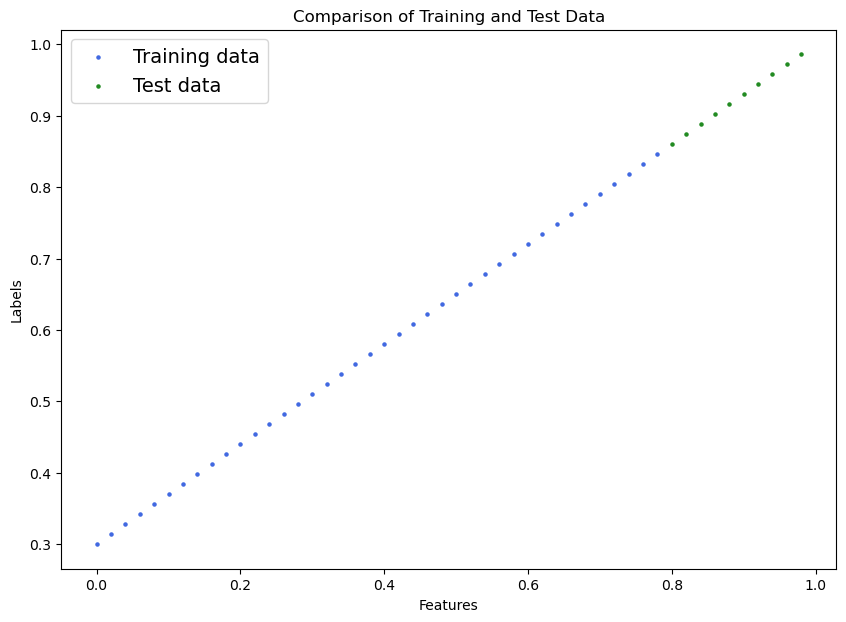

In [9]:
# Plotting using the plot_predictions function
plot_predictions(train_features=X_train,
                 train_labels=y_train,
                 test_features=X_test,
                 test_labels=y_test
                 )

### Basic Building Block of Pytorch Model

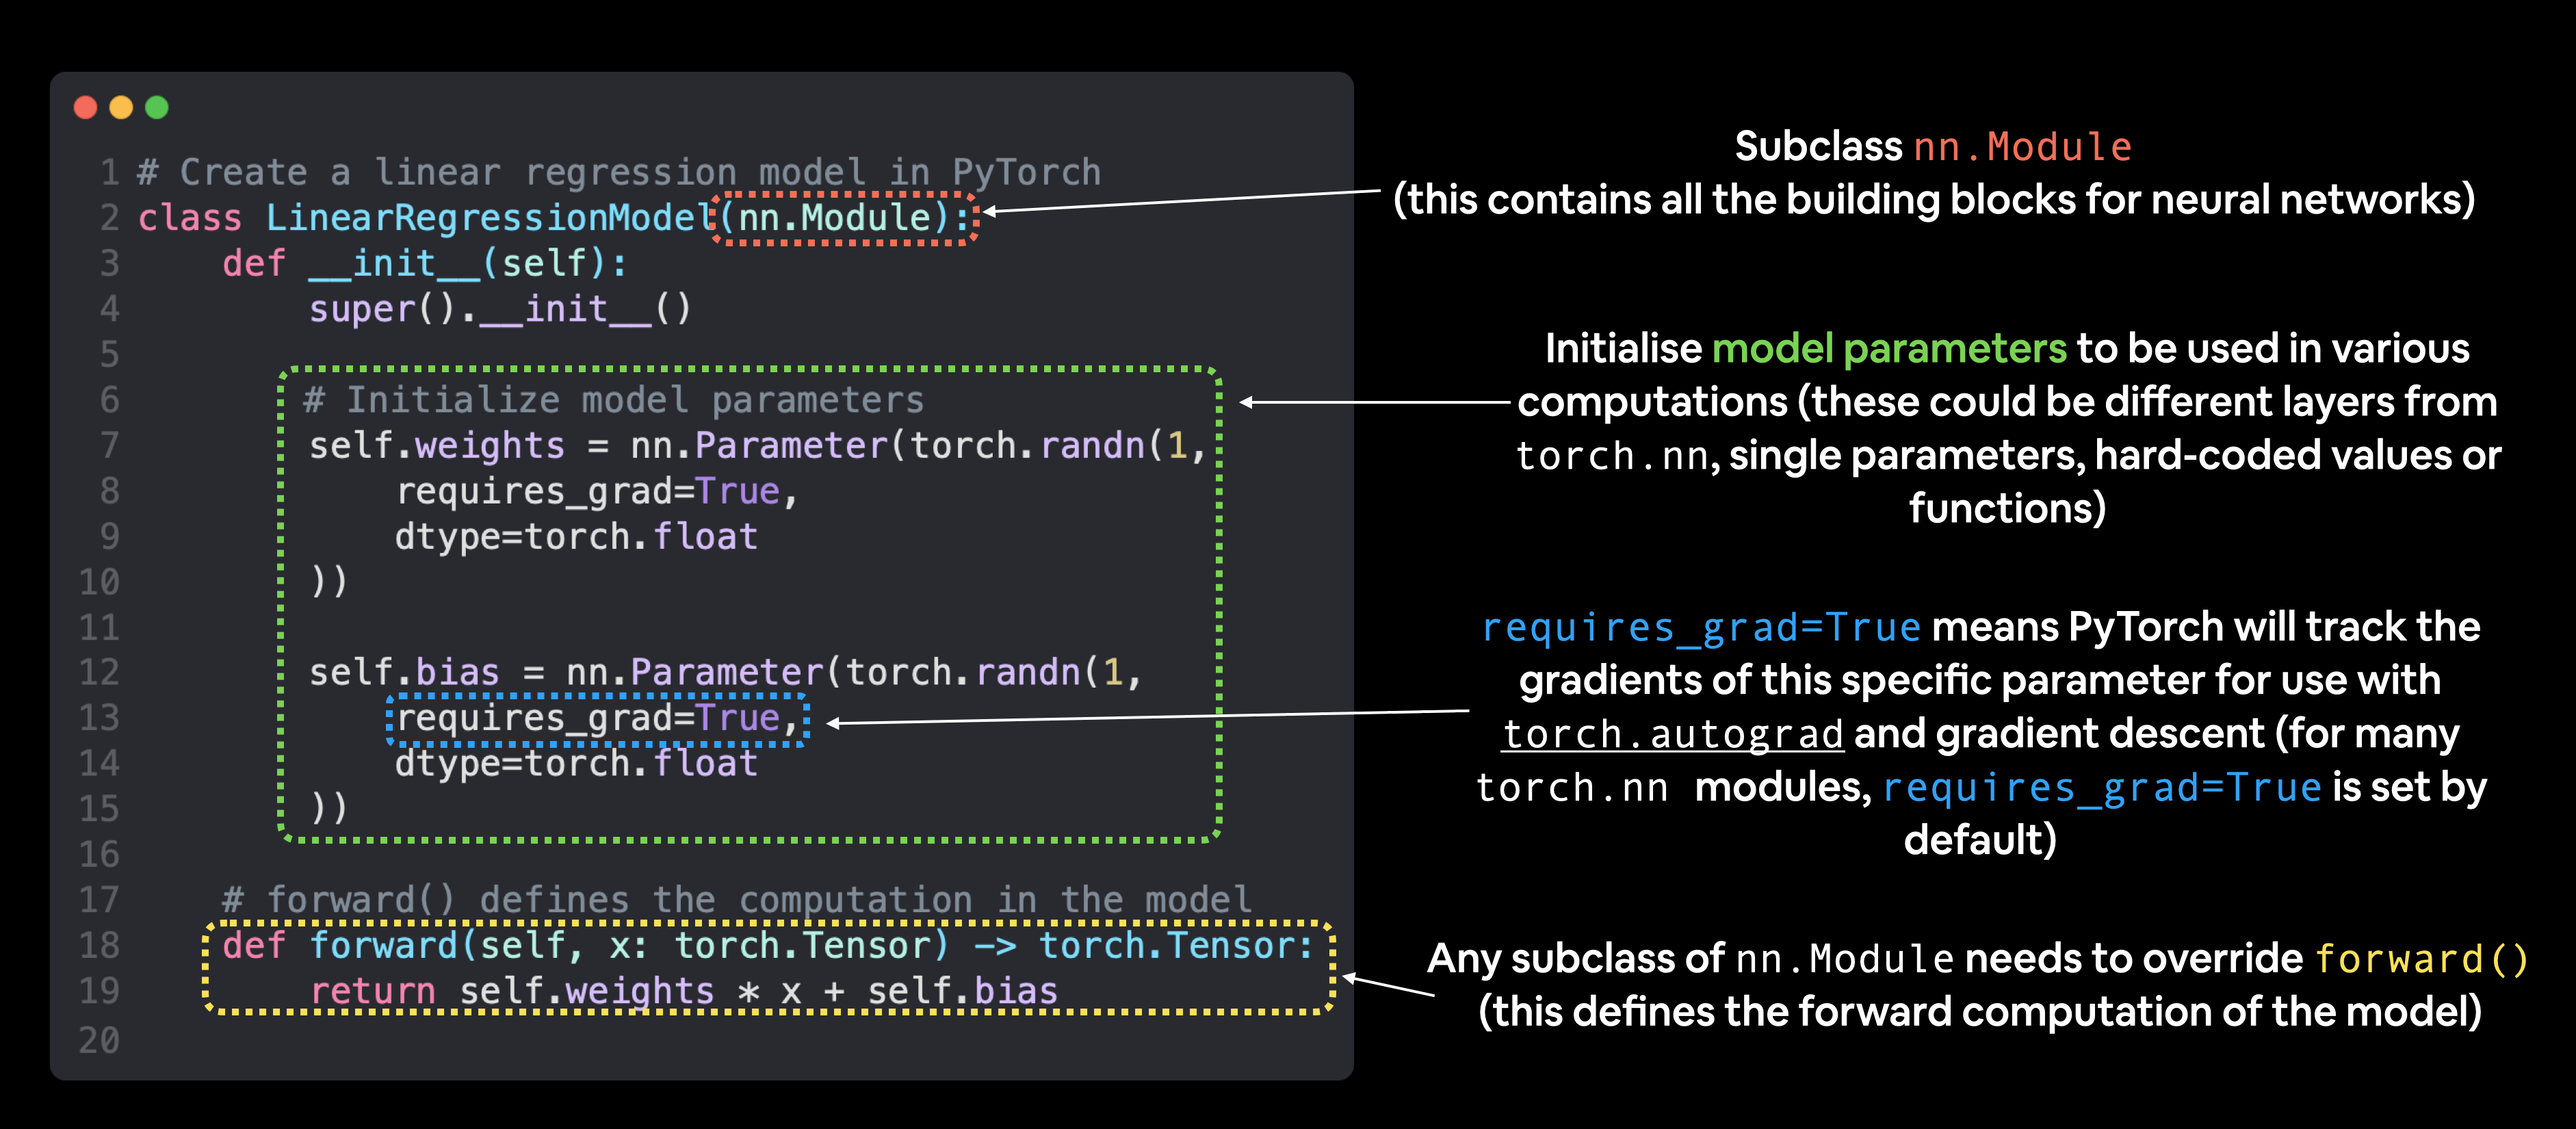

**Gradient descent** is an optimization technique that helps machine learning models iteratively adjust their parameters by moving in the direction of decreasing errors, using the slope (gradient) of the function they aim to minimize.

**Backpropagation** is a process in neural networks where the algorithm computes the gradient of the loss function with respect to the model's parameters by traversing the network in reverse, enabling efficient adjustment of these parameters to minimize errors during training.

In [10]:
import torch
import torch.nn as nn


class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        # INITIALIZATION OF MODEL PARAMETERS
        # Initialize weights and bias parameters for the linear regression model
        # These parameters will be adjusted during training via gradient descent
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        Performs the forward pass computation.

        Args:
        - x (torch.Tensor): Input data (e.g., training or testing features)

        Returns:
        - torch.Tensor: Predicted output based on the linear regression model
        """
        # Linear regression formula: y = mx + b
        return self.weights * x + self.bias

>`super().__init__()` is used in Python to explicitly call the parent class's constructor, allowing the current class to inherit and utilize the attributes and methods defined in its parent class.

| PyTorch Module              | Description                                                                                                                                              | Additional Info                                                                                                 |
|-----------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------|
| `torch.nn`                  | Contains fundamental building blocks for computational graphs, forming the backbone for defining neural network architectures.                        | Essential for constructing neural network layers, activation functions, loss functions, and defining model architectures.                                                      |
| `torch.nn.Parameter`        | Stores tensors compatible with `nn.Module`. When `requires_grad=True`, enables automatic gradient calculation (autograd), vital for updating model parameters. | Parameters used within the neural network that automatically track gradients during backpropagation for optimization (e.g., weights and biases).                              |
| `torch.nn.Module`           | The base class for all neural network modules, requiring the implementation of a `forward()` method. Represents neural network components and architectures. | Serves as the foundation for defining custom neural network architectures by subclassing and implementing the `forward()` method to define the data flow.             |
| `torch.optim`               | Houses various optimization algorithms that dictate how model parameters (from `nn.Parameter`) should update during gradient descent for minimizing loss.   | Provides optimization algorithms (e.g., SGD, Adam) that adjust model parameters based on computed gradients to minimize the defined loss function during training. |
| `torch.autograd`            | PyTorch's automatic differentiation engine, responsible for tracking operations on tensors and computing gradients automatically for backpropagation.         | Facilitates automatic computation of gradients during forward passes, crucial for efficient backpropagation and updating model parameters through optimization.       |
| `torch.utils.data.Dataset`  | An abstract class representing a dataset in PyTorch, providing an interface to access and manipulate data.                                                | Enables customization of data loading by subclassing, allowing access to individual data samples and their labels.                                                    |
| `torch.utils.data.DataLoader`| Wraps a dataset and provides an iterable over the dataset, simplifying data loading by creating batches, shuffling, and parallelizing data retrieval.     | Facilitates efficient data loading for training by handling batching, shuffling, and multiprocessing to feed data into neural networks during training.            |
| `def forward()`             | Mandatory method within `nn.Module` subclasses, specifying the computation to be performed on data passed through the module (e.g., formula in linear regression). | Crucial for defining the flow of data through a neural network layer, detailing how input data is processed to produce output.                                     |


For reference [Pytorch CheatSheet](https://pytorch.org/tutorials/beginner/ptcheat.html)

#### Checking contents of PyTorch Model

In [11]:
# Creating Random Seed
torch.manual_seed(seed=42)

# Creating an instance of the LinearRegressionModel (subclass of nn.Module)
model_0 = LinearRegressionModel()

# Checking out parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [12]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [13]:
# Creating a DataFrame to store the parameters
param_data = []
for name, param in model_0.named_parameters():
    param_data.append(
        [name, param.size(), param.data.numpy(), param.requires_grad])

# Creating a DataFrame from the parameter data
param_df = pd.DataFrame(param_data, columns=[
                        "Parameter Name", "Size", "Value", "Requires Gradient"])

# Displaying the DataFrame
print("Model_0 Parameters:")
display(param_df)

Model_0 Parameters:


Parameter Name  Size         Value  Requires Gradient
0        weights  (1,)  [0.33669037]               True
1           bias  (1,)   [0.1288094]               True

#### Makeing Prediction using `torch.inference_mode()`

* The context manager `torch.inference_mode()` is used to indicate that a specific code block within it doesn't require gradient computations.
  
* This means that during the execution of the code block wrapped within `torch.inference_mode()`, PyTorch won't calculate gradients for tensors, offering performance benefits by skipping gradient tracking.

* This mode is suitable for scenarios like inference, prediction, or any forward-pass-only computations where gradient tracking isn't needed.

> Can also use `torch.no_grad()` for older version

In [14]:
# Turns off gradient tracking, hence faster
with torch.inference_mode():
    y_pred = model_0(X_test)

In [15]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_pred)}")
print(f"Predicted values:\n{y_pred}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([0.3982, 0.4049, 0.4116, 0.4184, 0.4251, 0.4318, 0.4386, 0.4453, 0.4520,
        0.4588])


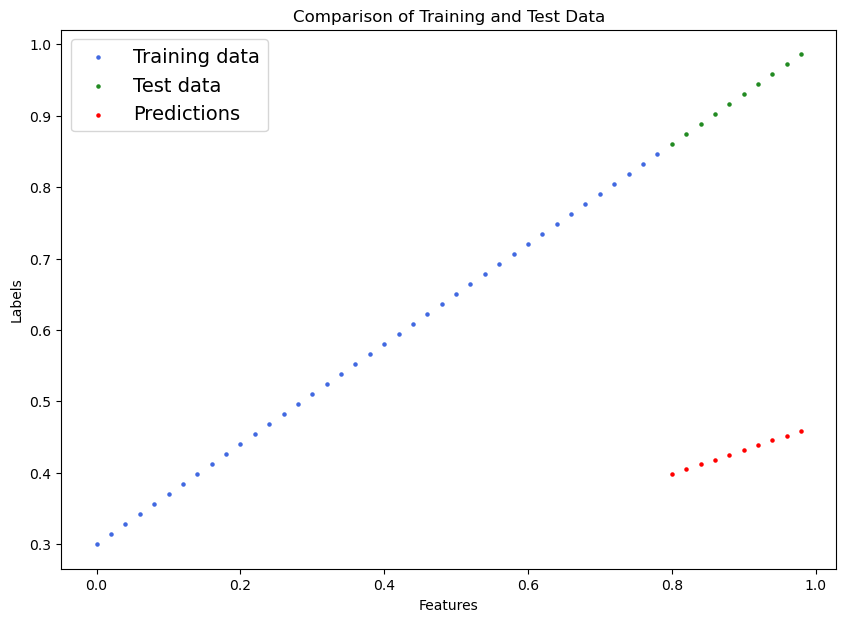

In [16]:
plot_predictions(
    train_features=X_train,
    train_labels=y_train,
    test_features=X_test,
    test_labels=y_test,
    predictions=y_pred
)

#### Training the Model

| Function       | Description                                                                                    | Location in PyTorch       | Common Values and Usage                                                    |
|----------------|------------------------------------------------------------------------------------------------|---------------------------|----------------------------------------------------------------------------|
| Loss function  | Measures the discrepancy between model predictions and truth labels; lower values indicate better predictions. | `torch.nn`                | - Mean Squared Error (MSE) for regression: `torch.nn.MSELoss()`<br/> - Huber loss for robust regression: `torch.nn.SmoothL1Loss()`<br/> - Cross Entropy for multi-class classification: `torch.nn.CrossEntropyLoss()` |
| Optimizer      | Guides the model's parameter updates to minimize the loss during training.                       | `torch.optim`             | - Stochastic Gradient Descent: `torch.optim.SGD()`<br/> - Adam optimizer: `torch.optim.Adam()`<br/> - RMSprop optimizer: `torch.optim.RMSprop()`<br/> - Adagrad optimizer: `torch.optim.Adagrad()` |


References to PyTorch documentation for loss functions and optimizers:

1. **Loss Functions**  
PyTorch offers a variety of [loss functions](https://pytorch.org/docs/stable/nn.html#loss-functions) in `torch.nn`:

    - **Mean Squared Error (MSE):** Measures the average squared difference between predictions and actual values (`torch.nn.MSELoss()`).
    
    - **Huber Loss (Smooth L1 Loss):** A robust regression loss, less sensitive to outliers than MSE (`torch.nn.SmoothL1Loss()`).
    
    - **Cross Entropy:** Used for multi-class classification tasks (`torch.nn.CrossEntropyLoss()`).

2.  **Optimizers**  
PyTorch provides various [optimizers](https://pytorch.org/docs/stable/optim.html) in `torch.optim`:

    - **Stochastic Gradient Descent (SGD):** Updates parameters with gradients to minimize loss (`torch.optim.SGD()`).
    
    - **Adam Optimizer:** Adaptive moment estimation, efficient for training deep models (`torch.optim.Adam()`).

    - **RMSprop:** An adaptive learning rate optimization algorithm (`torch.optim.RMSprop()`).

    - **Adagrad:** Adapts the learning rate to each parameter's historical gradients (`torch.optim.Adagrad()`).

In [17]:
#  MAE Loss function from scrath
mae_loss = torch.mean(torch.abs(y_pred - y_test))
print(f"Mean Absolute Error : {mae_loss.numpy()}")

Mean Absolute Error : 0.4945361614227295


In [18]:
# Loss Function
loss_fn = nn.L1Loss()

# Optimizers
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01
                            )

> Extra: [Learning Rate Scheduler](https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate)

##### Losses in PyTorch:

Certainly! Here's a list of various loss functions available in PyTorch, along with their use cases:

1. Regression Losses:
    * **Mean Squared Error (MSE) Loss (`torch.nn.MSELoss()`):**
        - Measures the average squared difference between predictions and actual values.
        - **Use Case:** Standard choice for regression tasks where smaller errors are desired.

    * **Mean Absolute Error (MAE) Loss (`torch.nn.L1Loss()`):**
        - Measures the average absolute difference between predictions and actual values.
        - **Use Case:** Suitable for regression tasks when outliers need to be handled cautiously.

    * **Huber Loss (Smooth L1 Loss) (`torch.nn.SmoothL1Loss()`):**
        - Combines properties of MSE and MAE, less sensitive to outliers.
        - **Use Case:** Robust regression when the presence of outliers is expected.

1. Classification Losses:
    * **Cross Entropy Loss (`torch.nn.CrossEntropyLoss()`):**  
        - Used for multi-class classification tasks.
        - **Use Case:** Ideal for problems with multiple classes and class imbalance.

    * **Binary Cross Entropy Loss (`torch.nn.BCELoss()`):**  
        - Computes the loss between predicted probabilities and true binary labels.
        - **Use Case:** Suitable for binary classification problems.

    * **Kullback-Leibler Divergence Loss (`torch.nn.KLDivLoss()`):**  
        - Measures the divergence between two distributions.
        - **Use Case:** Commonly used in variational autoencoders and generative models.

1. Sequence Losses:
    * **CTC Loss (`torch.nn.CTCLoss()`):**  
        - Used for sequence labeling tasks, especially in speech recognition.
        - **Use Case:** Handling variable-length sequences and aligning them to targets.

1. Embedding Losses:
    * **Triplet Margin Loss (`torch.nn.TripletMarginLoss()`):**  
        - Encourages embeddings from the same class to be closer while pushing apart embeddings from different classes.
        - **Use Case:** Used in metric learning for tasks like face recognition and recommendation systems.

1. Generative Adversarial Network (GAN) Losses:
    * **Adversarial Losses (`torch.nn.BCEWithLogitsLoss()`):**
        - Used in GANs to train the discriminator to distinguish between real and fake samples.
        - **Use Case:** Integral in GAN training to update the discriminator and generator networks.


#### Loop Optimization in PyTorch

> TRAINING LOOP

| Number | Step Name              | What Does It Do?                                                                                                               | Code Example                      |
|--------|------------------------|--------------------------------------------------------------------------------------------------------------------------------|-----------------------------------|
| 1      | Forward Pass           | Executes the model's forward pass on the training data to produce predictions.                                                 | `model(x_train)`                  |
| 2      | Calculate the Loss     | Compares the model's predictions to the actual ground truth labels, evaluating the magnitude of errors.                         | `loss = loss_fn(y_pred, y_train)` |
| 3      | Zero Gradients         | Resets the gradients of the optimizer to zero, preparing them for new gradient calculations in the upcoming training step.    | `optimizer.zero_grad()`           |
| 4      | Backpropagation        | Computes gradients of the loss with respect to each model parameter having `requires_grad=True`, facilitating updates.          | `loss.backward()`                 |
| 5      | Update the Optimizer   | Adjusts parameters (with `requires_grad=True`) with respect to computed gradients, improving them via the optimizer's method. | `optimizer.step()`                |


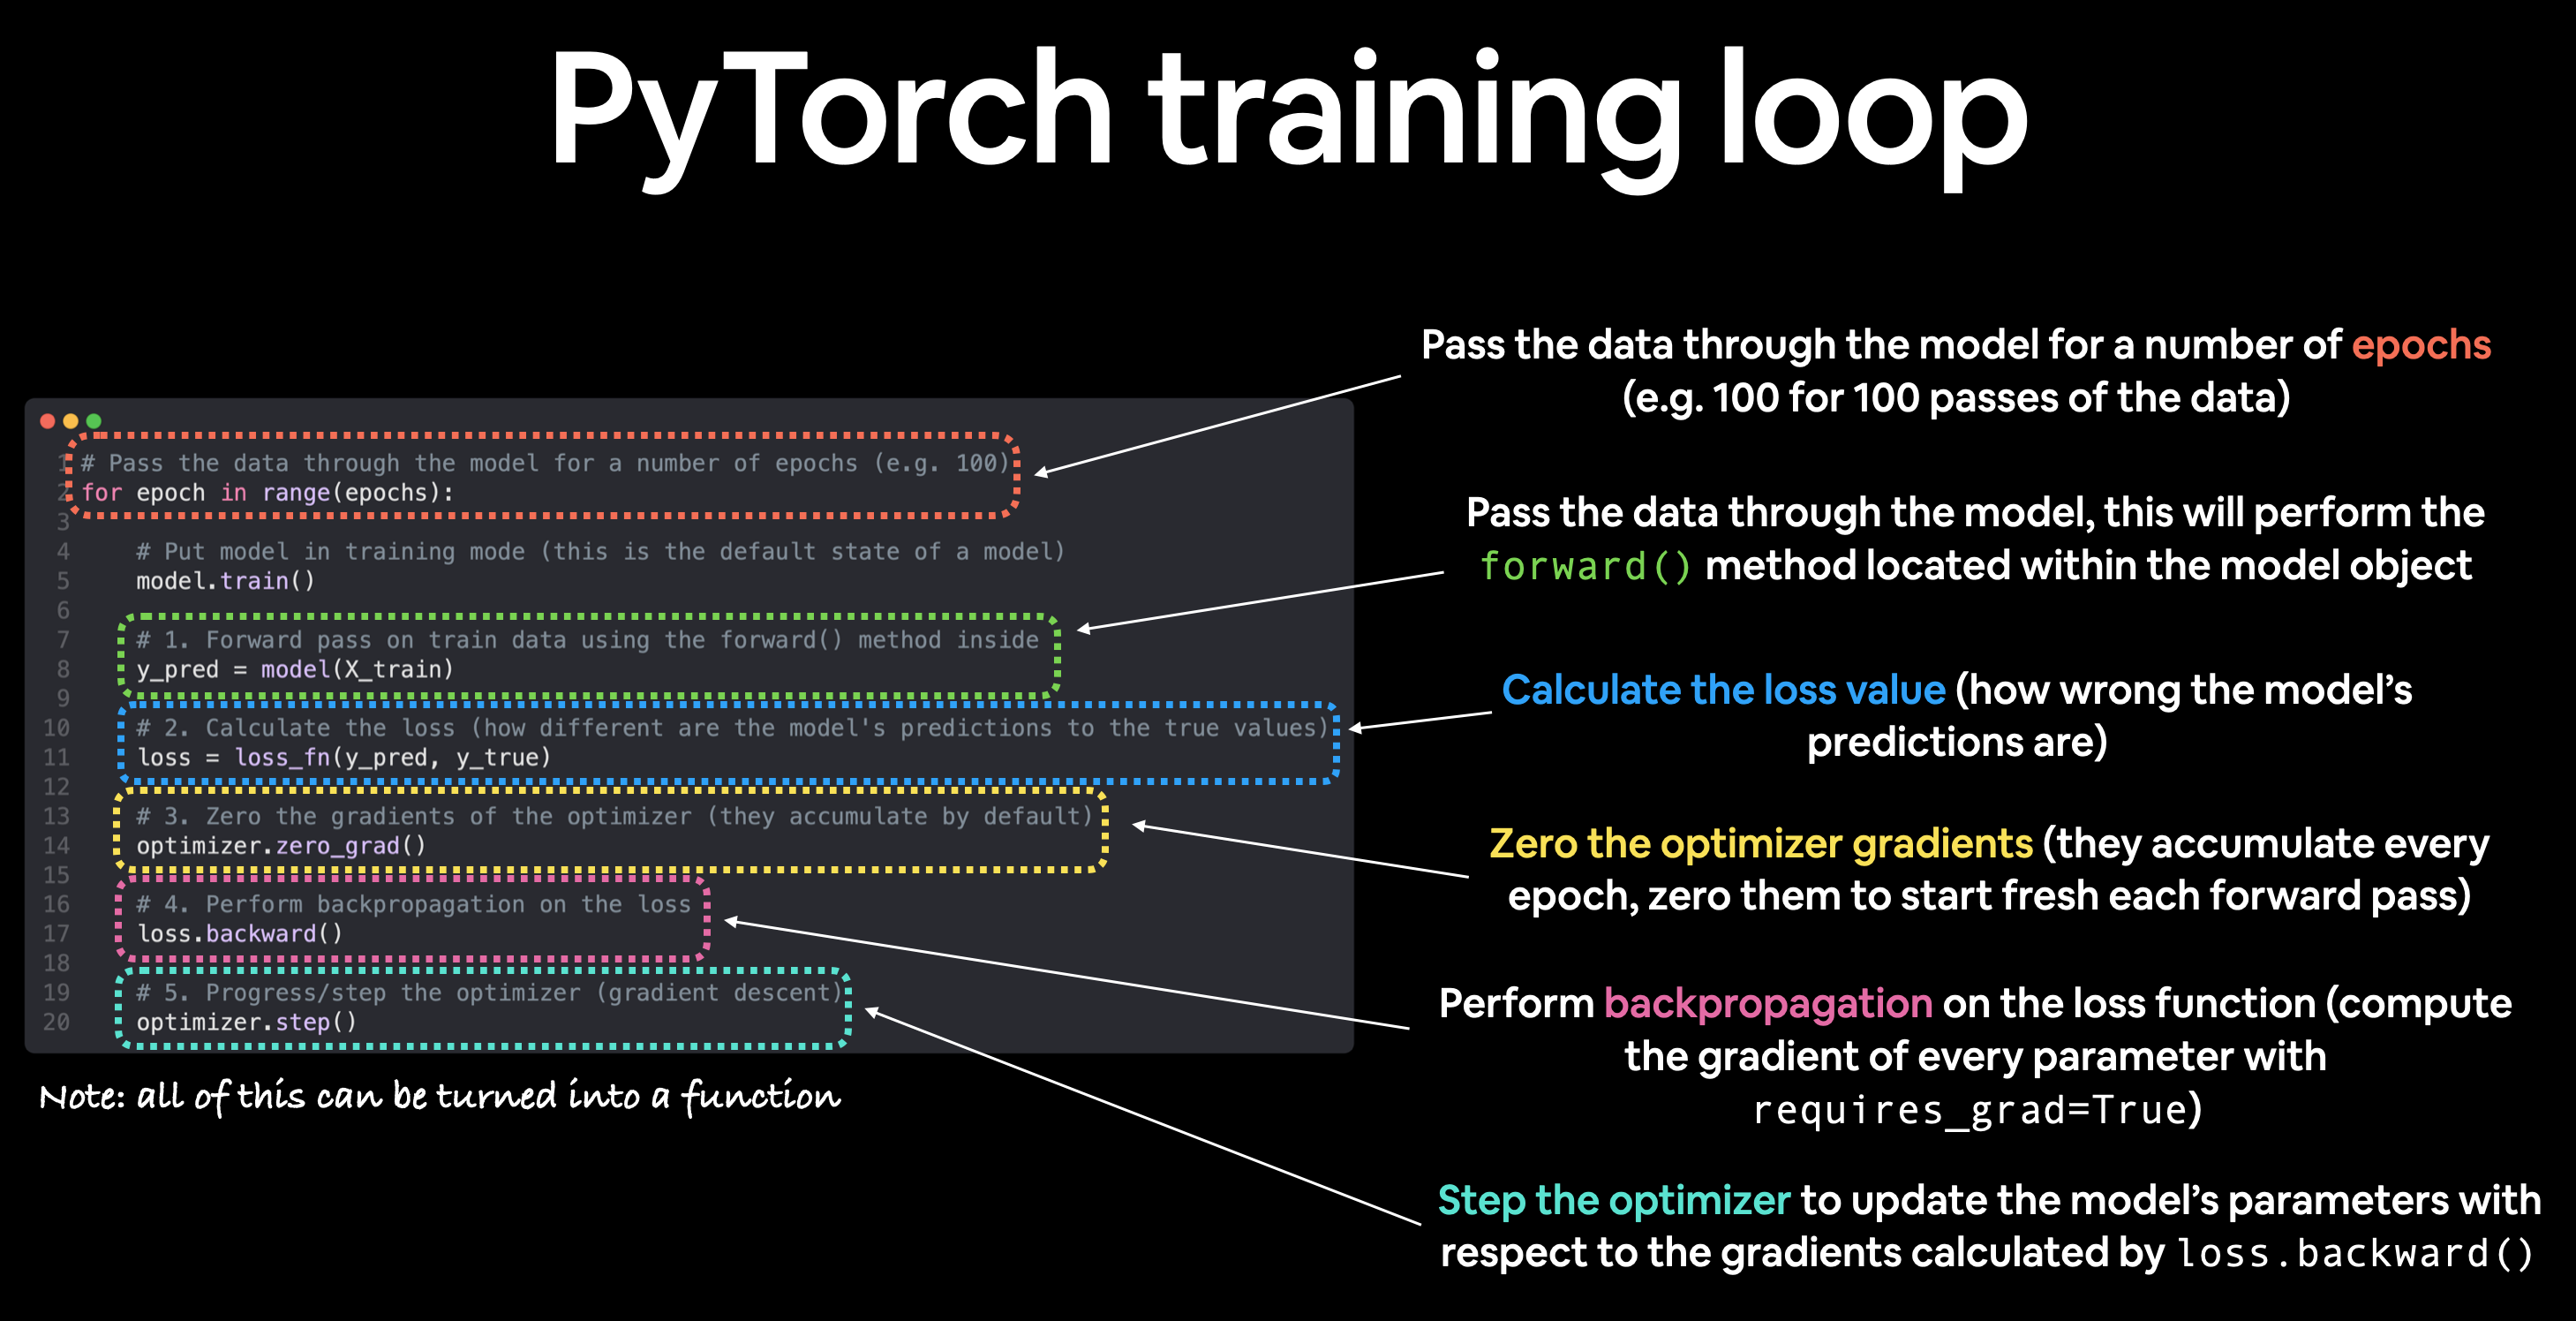

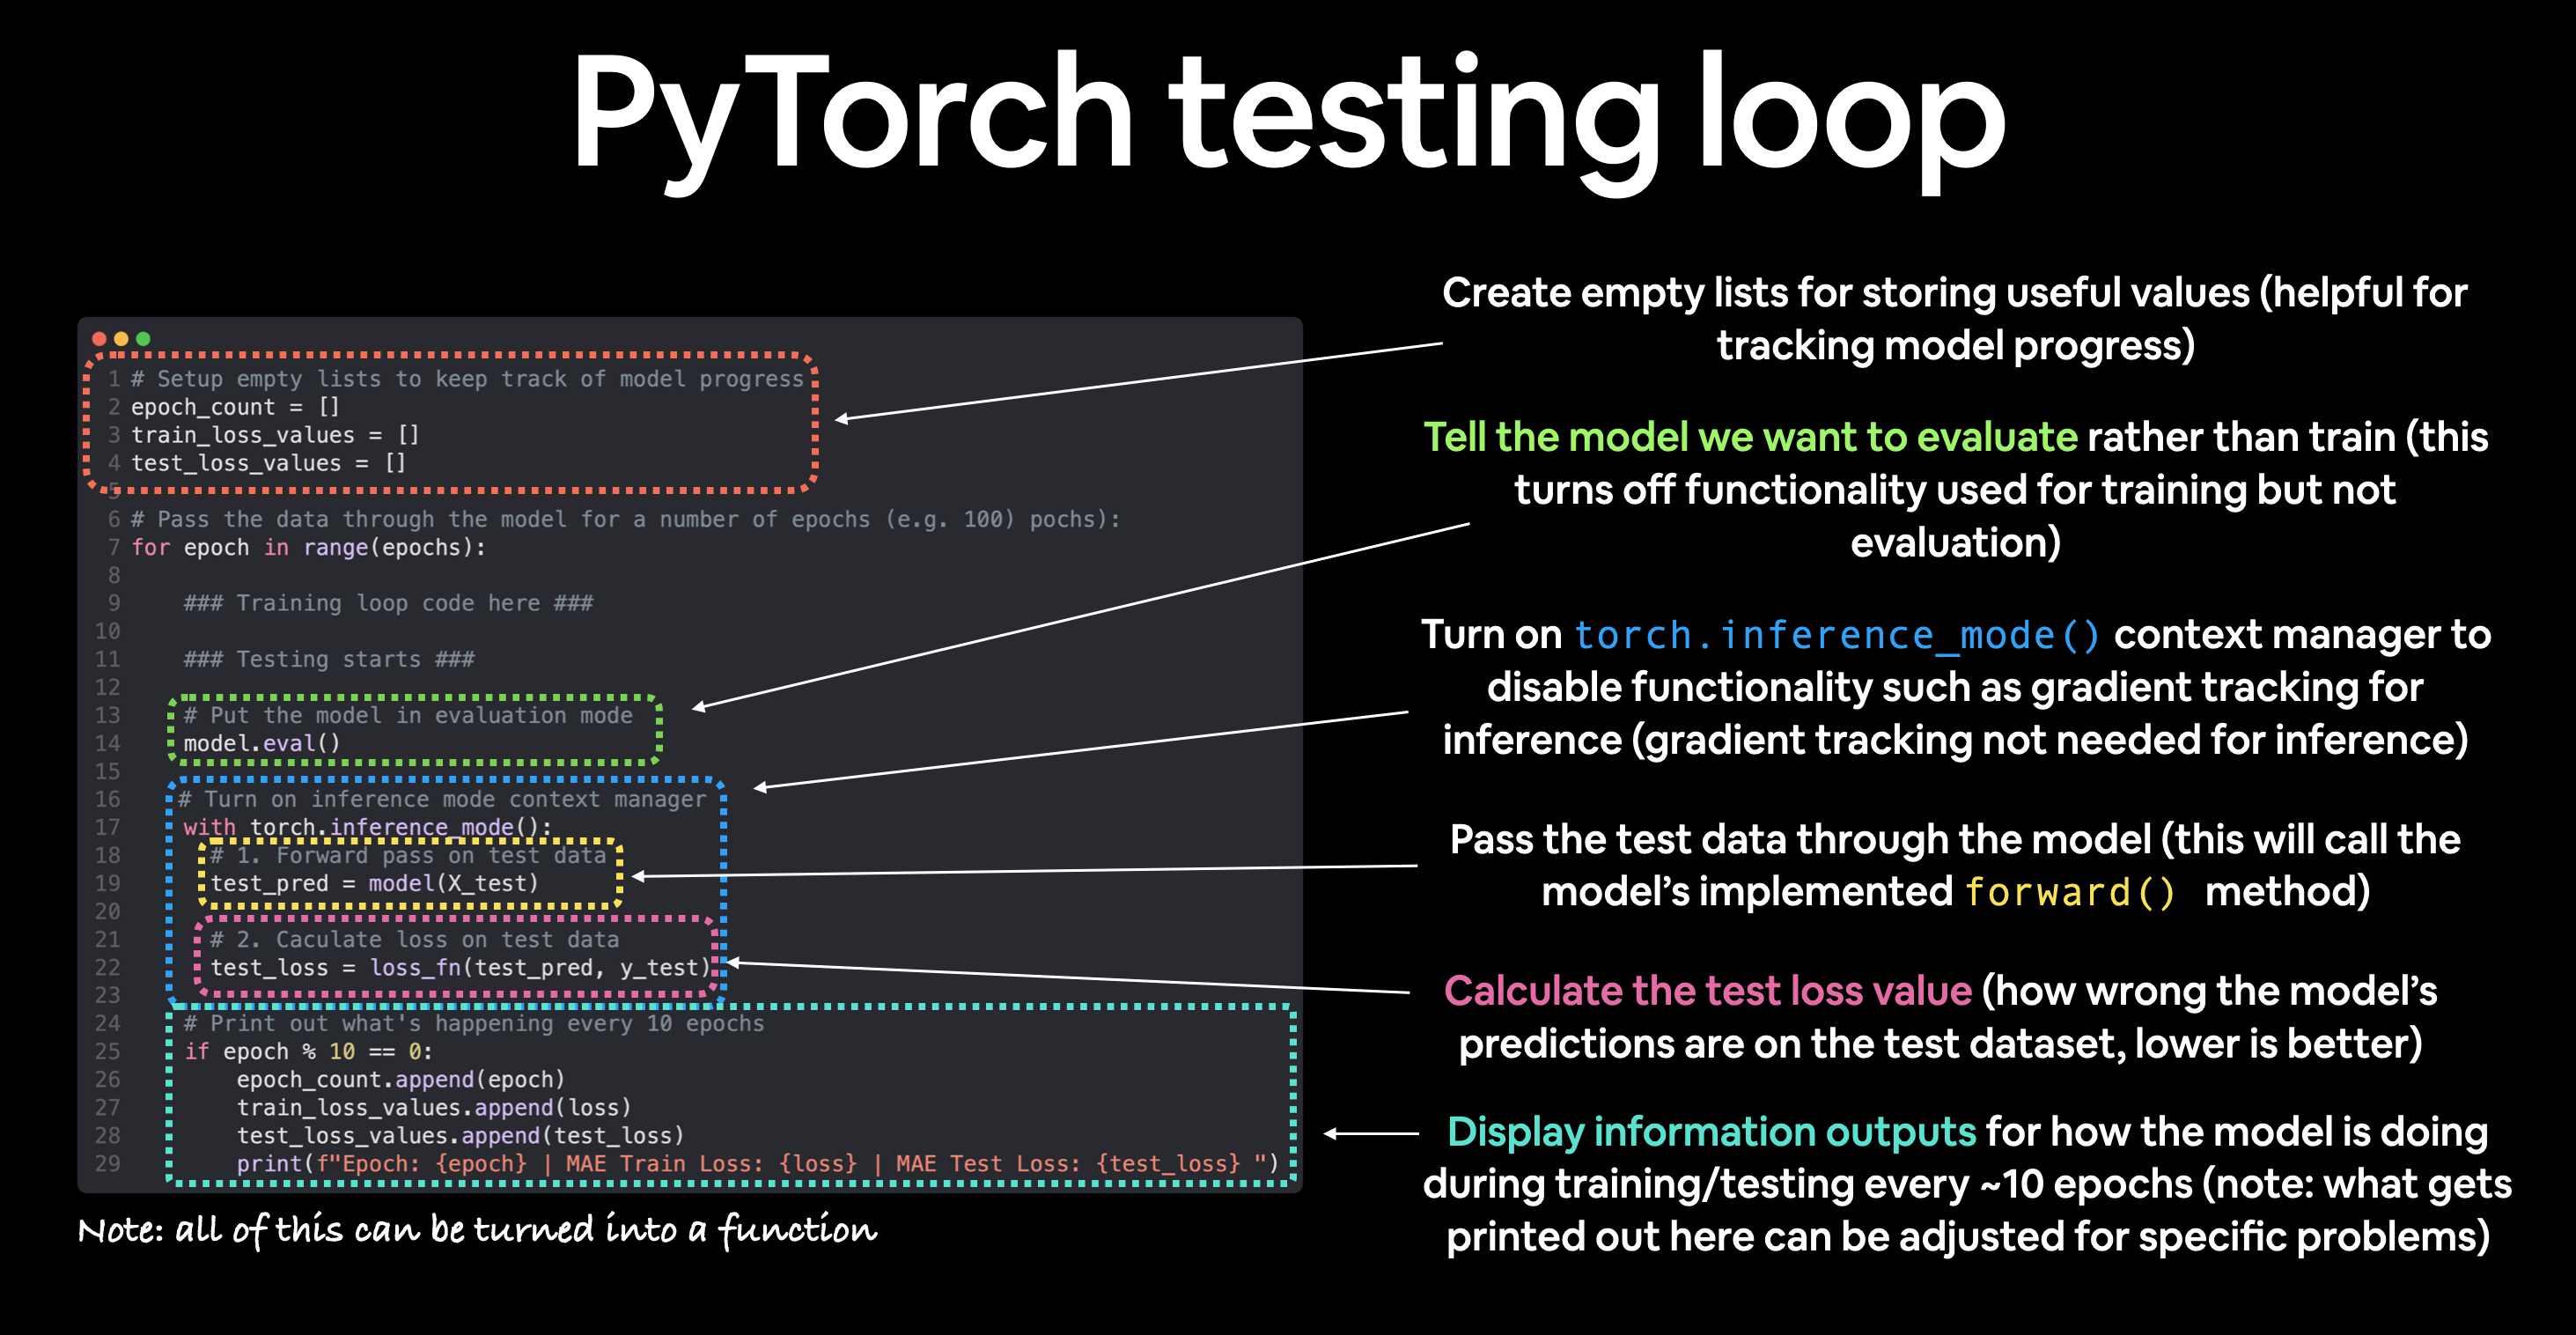

> TESTING LOOP

| Number | Step Name                     | What Does It Do?                                                                                              | Code Example                            |
|--------|-------------------------------|---------------------------------------------------------------------------------------------------------------|-----------------------------------------|
| 1      | Forward pass                  | Performs forward pass using the model on the test data to generate predictions.                               | `model(x_test)`                         |
| 2      | Calculate the loss            | Compares model predictions to ground truth to assess the deviation or error.                                    | `loss = loss_fn(y_pred, y_test)`        |
| 3      | Calculate evaluation metrics   | Optionally, computes additional evaluation metrics like accuracy, alongside the loss, on the test dataset.   | `accuracy = calculate_accuracy(...)`    |


In [19]:
# Setting the number of epochs for the training loop
epochs = 150

# Tracking Values
epoch_count = []
loss_values = []
test_loss_values = []

# Loop through the dataset for each epoch
for epoch in range(epochs):
    ########## TRAINING LOOP ################
    # Set the model to training mode for parameter updates
    model_0.train()  # Activates gradient tracking and sets parameters to training mode

    # STEP 1: FORWARD PASS
    # Perform forward pass to generate predictions
    y_pred = model_0(X_train)

    # STEP 2: LOSS CALCULATION
    # Compute the loss between predictions and ground truth
    loss = loss_fn(y_pred, y_train)

    # Print epoch details
    # print(f'\n{"-"*20} Epoch - {epoch+1} {"-"*20}')
    # print(f"Loss: {loss:.4f}")
    # print(
    #     f"Parameters:\n\tWeight: {model_0.state_dict()['weights']}\n\tBias: {model_0.state_dict()['bias']}")

    # STEP 3: GRADIENT RESET
    # Reset gradients before backpropagation
    optimizer.zero_grad()

    # STEP 4: BACKPROPAGATION
    # Compute gradients of loss w.r.t. model parameters
    loss.backward()

    # STEP 5: PARAMETER UPDATES
    # Update model parameters using the computed gradients
    optimizer.step()

    ########### TESTING LOOP ###############
    # Set the model to evaluation mode to disable gradient tracking for inference
    model_0.eval()   # Disables gradient tracking for inference or evaluation

    with torch.inference_mode():
        # STEP ! : FOWRARD PASS
        test_pred = model_0(X_test)

        # STEP 2 : LOSS CALC
        test_loss = loss_fn(test_pred, y_test)

        # Print Every epoch
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            loss_values.append(loss)
            test_loss_values.append(test_loss)
            # print every 10th epich
            print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
            # print out model state  dict
            print(f"Model Parameters:= Weight: {model_0.state_dict()['weights'].numpy()} | Bias: {model_0.state_dict()['bias'].numpy()}\n")

Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
Model Parameters:= Weight: [0.34059036] | Bias: [0.13880941]

Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
Model Parameters:= Weight: [0.37959027] | Bias: [0.23880947]

Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
Model Parameters:= Weight: [0.41842023] | Bias: [0.3333094]

Epoch: 30 | Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
Model Parameters:= Weight: [0.45118022] | Bias: [0.37680942]

Epoch: 40 | Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
Model Parameters:= Weight: [0.47481018] | Bias: [0.3868094]

Epoch: 50 | Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
Model Parameters:= Weight: [0.4938102] | Bias: [0.38430944]

Epoch: 60 | Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
Model Parameters:= Weight: [0.5116002] | Bias: [0.3788095]

Epoch: 70 | Loss: 0.03476089984178543 | Test Loss: 0.0805937647819519
Model 

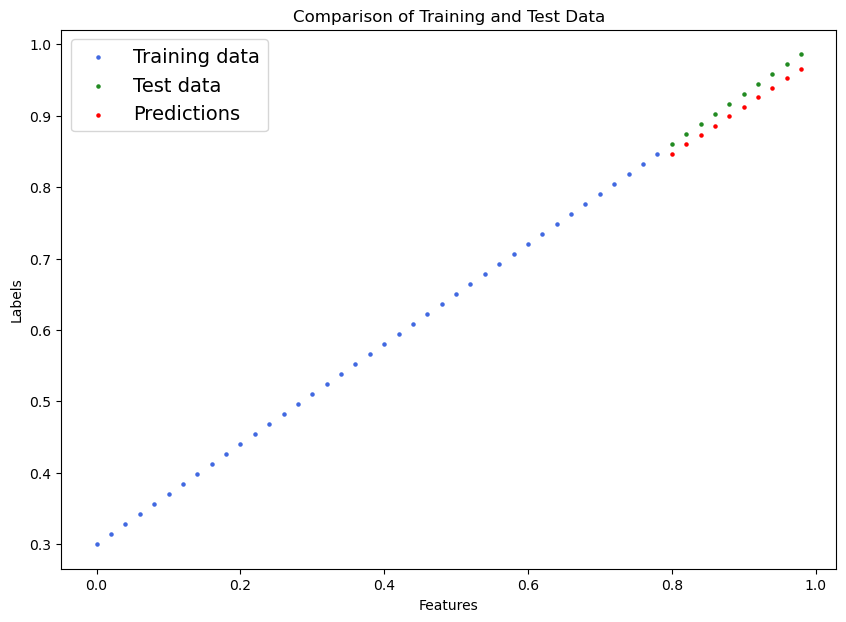

In [20]:
with torch.inference_mode():
    y_pred_new = model_0(X_test)

plot_predictions(
    train_features=X_train,
    train_labels=y_train,
    test_features=X_test,
    test_labels=y_test,
    predictions=y_pred_new
)

In [21]:
torch.tensor(loss_values).numpy()

array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
       0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
       0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659],
      dtype=float32)

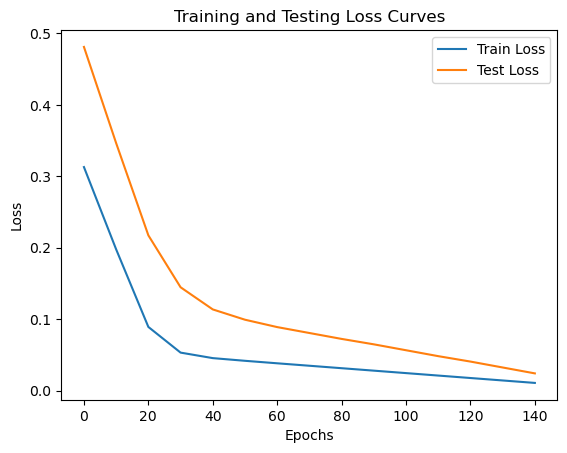

In [22]:
# plot loss curves
plt.plot(epoch_count, torch.tensor(loss_values).numpy(), label = "Train Loss")
plt.plot(epoch_count, torch.tensor(test_loss_values).numpy(), label="Test Loss")
plt.title("Training and Testing Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()